In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [2]:
corona_data_csv= pd.read_csv(r"C:\Users\varsh\OneDrive\Desktop\Projects\COVID-19\Covid Data.csv")
corona_data_csv.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
corona_data_csv.shape

(1048575, 21)

In [4]:
(corona_data_csv.duplicated().sum()/corona_data_csv.shape[0])*100

77.44310135183463

In [5]:
corona_data_csv.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [6]:
# Check for missing values
corona_data_csv.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [7]:
df_null = corona_data_csv.copy()
for i in [97,98, 99]:                           
       df_null.replace(i , np.nan, inplace = True)
df_null.isnull().sum() 

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

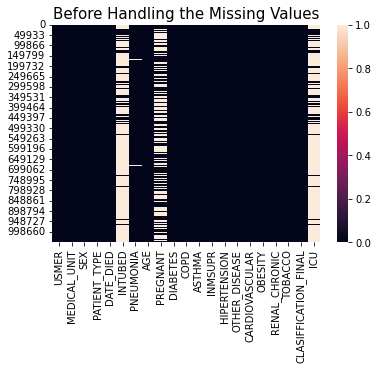

In [8]:
sns.heatmap(df_null.isnull())
plt.title('Before Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

In [9]:
corona_data_csv['DATE_DIED'][corona_data_csv['DATE_DIED'].apply(lambda x: isinstance(x, str))]

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

In [10]:
corona_data_csv['DEAD'] = [0 if i=='9999-99-99' else 1 for i in corona_data_csv.DATE_DIED]

In [11]:
corona_data_csv['DEAD'].value_counts()

0    971633
1     76942
Name: DEAD, dtype: int64

In [12]:
corona_data_csv['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [13]:
corona_data_csv['DATE_DIED'] =  pd.to_datetime(corona_data_csv['DATE_DIED'], format='%d/%m/%Y')
corona_data_csv['DATE_DIED']

0         2020-05-03
1         2020-06-03
2         2020-06-09
3         2020-06-12
4         2020-06-21
             ...    
1048570          NaT
1048571          NaT
1048572          NaT
1048573          NaT
1048574          NaT
Name: DATE_DIED, Length: 1048575, dtype: datetime64[ns]

In [14]:
corona_data_csv['DATE_DIED'].isnull().sum()

971633

In [15]:
corona_data_csv.describe().round(3).T.drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
USMER,1.632,0.482,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.981,3.723,1.0,4.0,12.0,12.0,13.0
SEX,1.499,0.500,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.191,0.393,1.0,1.0,1.0,1.0,2.0
INTUBED,79.523,36.869,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,3.347,11.913,1.0,2.0,2.0,2.0,99.0
AGE,41.794,16.907,0.0,30.0,40.0,53.0,121.0
PREGNANT,49.766,47.511,1.0,2.0,97.0,97.0,98.0
DIABETES,2.186,5.424,1.0,2.0,2.0,2.0,98.0
COPD,2.261,5.132,1.0,2.0,2.0,2.0,98.0


In [16]:
corona_data_csv.SEX.value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [17]:
corona_data_csv.SEX.shape

(1048575,)

In [18]:
females=corona_data_csv[(corona_data_csv['SEX'] == 1)].shape
males=corona_data_csv[(corona_data_csv['SEX']==2)].shape
print("males =", males , "females =",females)

males = (523511, 22) females = (525064, 22)


In [19]:
corona_data_csv[(corona_data_csv['SEX'] == 1)]['PREGNANT'].value_counts() # Females corresponding values in 'PREGNANT' feature

2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [20]:
corona_data_csv[(corona_data_csv['SEX'] == 2)]['PREGNANT'].value_counts() #Checking for wrong entries for males as 'PREGNANT'

97    523511
Name: PREGNANT, dtype: int64

In [21]:
corona_data_csv['PREGNANT'].replace (97, 2, inplace = True)

In [22]:
corona_data_csv.ICU.value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [23]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at ICU = {i} the shape will be:", "\n")
        print (corona_data_csv[(corona_data_csv['PATIENT_TYPE'] == j) & (corona_data_csv['ICU'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at ICU = 1 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 1 the shape will be: 

(16858, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 2 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 2 the shape will be: 

(175685, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 97 the shape will be: 

(848544, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 99 the shape will be: 

(0, 22) 
 -----------------

In [24]:
corona_data_csv["ICU"].replace(97,2,inplace=True)

In [25]:
corona_data_csv["ICU"].value_counts()

2     1024229
1       16858
99       7488
Name: ICU, dtype: int64

In [26]:
corona_data_csv["INTUBED"].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [27]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and INTUBED = {i} the shape will be:", "\n")
        print (corona_data_csv[(corona_data_csv['PATIENT_TYPE'] == j) & (corona_data_csv['ICU'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and INTUBED = 1 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and INTUBED = 1 the shape will be: 

(16858, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and INTUBED = 2 the shape will be: 

(848544, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and INTUBED = 2 the shape will be: 

(175685, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and INTUBED = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and INTUBED = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and INTUBED = 99 the shape will be: 

(0, 22) 
 ----------

In [28]:
corona_data_csv["INTUBED"].replace(97,2,inplace=True)

In [29]:
corona_data_csv["INTUBED"].value_counts()

2     1007594
1       33656
99       7325
Name: INTUBED, dtype: int64

In [30]:
for i in [98, 99]:
   corona_data_csv.replace(i , np.nan, inplace = True)

In [31]:
 corona_data_csv

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-05-03,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-06-03,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-06-09,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-06-12,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,2.0,2.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048571,1,13,2,2,NaT,2.0,2.0,51.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048572,2,13,2,1,NaT,2.0,2.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048573,2,13,2,1,NaT,2.0,2.0,28.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0


In [32]:
df_null2 = corona_data_csv.copy()
df_null2.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED               971633
INTUBED                   7325
PNEUMONIA                16003
AGE                        210
PREGNANT                  3754
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                       7488
DEAD                         0
dtype: int64

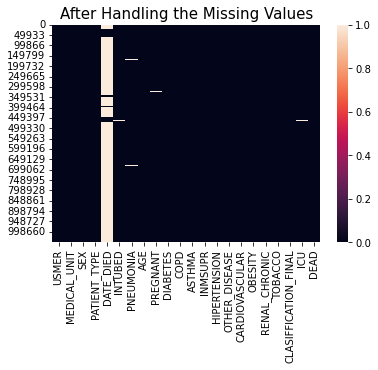

In [33]:
sns.heatmap(df_null2.isnull())
plt.title('After Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

In [34]:
df_null2.DATE_DIED = df_null2.DATE_DIED.fillna("9999-99-99")

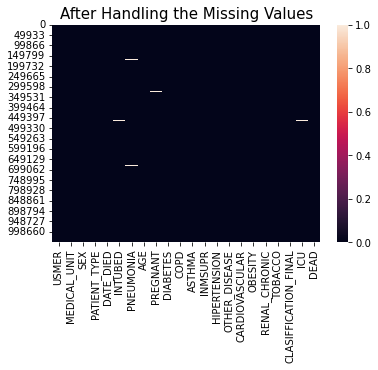

In [35]:
sns.heatmap(df_null2.isnull())
plt.title('After Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

In [36]:
corona_data_csv.describe().round(3).T.drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
USMER,1.632,0.482,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.981,3.723,1.0,4.0,12.0,12.0,13.0
SEX,1.499,0.500,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.191,0.393,1.0,1.0,1.0,1.0,2.0
INTUBED,1.968,0.177,1.0,2.0,2.0,2.0,2.0
PNEUMONIA,1.864,0.342,1.0,2.0,2.0,2.0,2.0
AGE,41.783,16.890,0.0,30.0,40.0,53.0,121.0
PREGNANT,1.992,0.088,1.0,2.0,2.0,2.0,2.0
DIABETES,1.880,0.324,1.0,2.0,2.0,2.0,2.0
COPD,1.986,0.119,1.0,2.0,2.0,2.0,2.0


In [37]:
# looking at all the different classes present in the dataset
for i in corona_data_csv.columns:
    if(i!='AGE' and i!='DATE_DIED'):
        print(i," -> ", dict(corona_data_csv[i].value_counts()))

USMER  ->  {2: 662903, 1: 385672}
MEDICAL_UNIT  ->  {12: 602995, 4: 314405, 6: 40584, 9: 38116, 3: 19175, 8: 10399, 10: 7873, 5: 7244, 11: 5577, 13: 996, 7: 891, 2: 169, 1: 151}
SEX  ->  {1: 525064, 2: 523511}
PATIENT_TYPE  ->  {1: 848544, 2: 200031}
INTUBED  ->  {2.0: 1007594, 1.0: 33656}
PNEUMONIA  ->  {2.0: 892534, 1.0: 140038}
PREGNANT  ->  {2.0: 1036690, 1.0: 8131}
DIABETES  ->  {2.0: 920248, 1.0: 124989}
COPD  ->  {2.0: 1030510, 1.0: 15062}
ASTHMA  ->  {2.0: 1014024, 1.0: 31572}
INMSUPR  ->  {2.0: 1031001, 1.0: 14170}
HIPERTENSION  ->  {2.0: 882742, 1.0: 162729}
OTHER_DISEASE  ->  {2.0: 1015490, 1.0: 28040}
CARDIOVASCULAR  ->  {2.0: 1024730, 1.0: 20769}
OBESITY  ->  {2.0: 885727, 1.0: 159816}
RENAL_CHRONIC  ->  {2.0: 1026665, 1.0: 18904}
TOBACCO  ->  {2.0: 960979, 1.0: 84376}
CLASIFFICATION_FINAL  ->  {7: 499250, 3: 381527, 6: 128133, 5: 26091, 1: 8601, 4: 3122, 2: 1851}
ICU  ->  {2.0: 1024229, 1.0: 16858}
DEAD  ->  {0: 971633, 1: 76942}


EDA

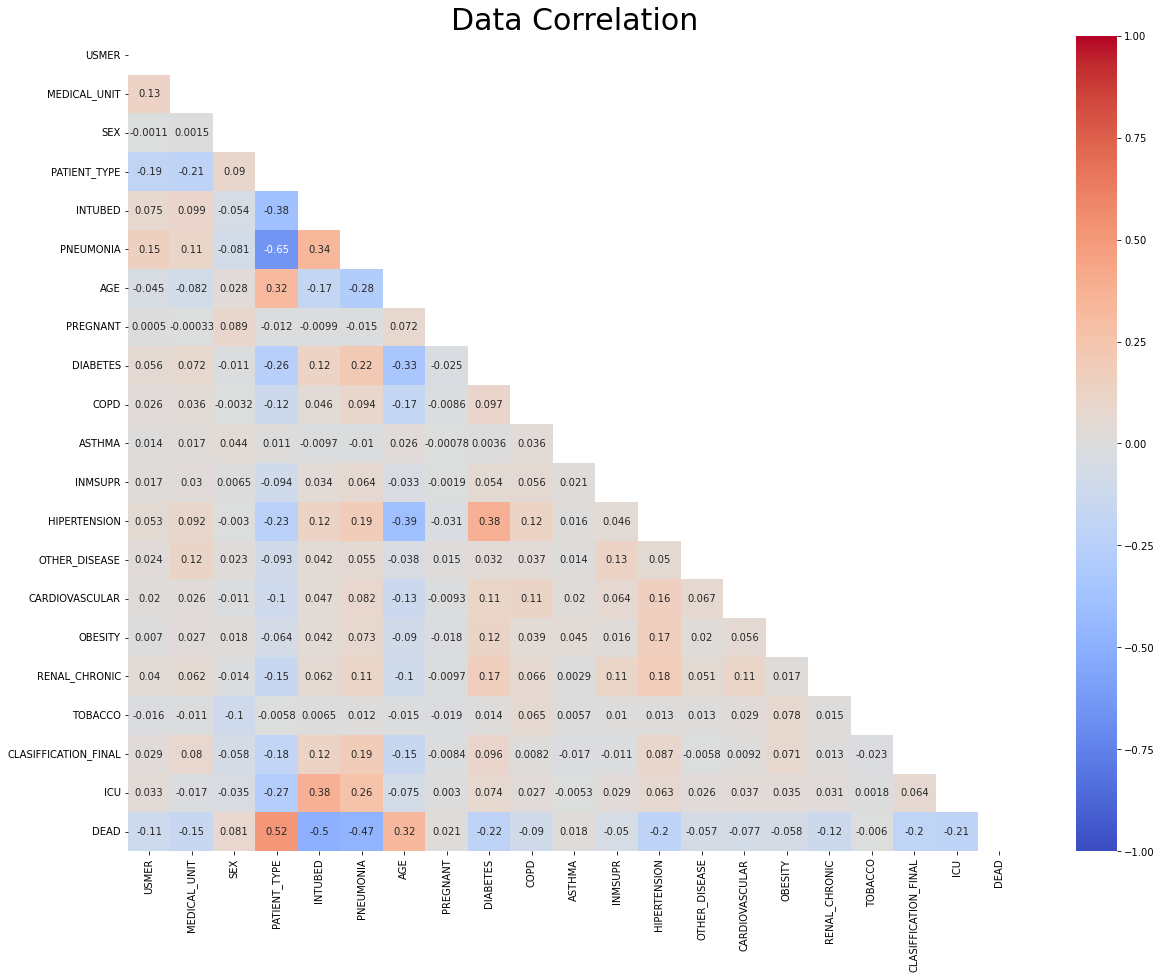

In [38]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(corona_data_csv.drop(columns=['DATE_DIED']).corr()))
sns.heatmap(corona_data_csv.drop(columns=['DATE_DIED']).corr(), mask = mask, annot = True, cmap = "coolwarm", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize = 30)
plt.show()

In [39]:
df_med = corona_data_csv.drop(columns=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
                          'INTUBED', 'AGE', 'CLASIFFICATION_FINAL', 'ICU'], axis=1)
df_med

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEAD
0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048571,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0
1048572,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048573,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [40]:
corona_data_csv['DEAD'].value_counts()

0    971633
1     76942
Name: DEAD, dtype: int64

In [41]:
Dead = corona_data_csv['DEAD']
Dead = Dead.replace(1, "Dead")
Dead = Dead.replace(0, "Alive")
Dead.value_counts()

Alive    971633
Dead      76942
Name: DEAD, dtype: int64

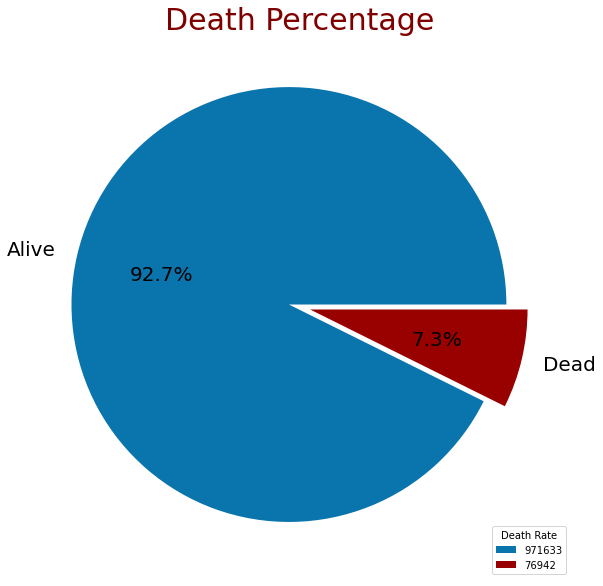

In [42]:
labels = ["Alive", "Dead"]
sizes = corona_data_csv['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage',color = '#800000',fontsize = 30)
plt.legend(corona_data_csv['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [43]:
df_dead = corona_data_csv[corona_data_csv["DEAD"] == 1]
df_dead

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-05-03,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-06-03,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-06-09,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-06-12,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,2020-07-18,1.0,1.0,73.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1
1047636,1,13,2,1,2020-07-26,2.0,1.0,82.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047637,1,13,1,1,2020-07-27,2.0,1.0,82.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047638,1,13,2,2,2020-07-29,1.0,1.0,80.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1


In [44]:
df_dead["CLASIFFICATION_FINAL"].value_counts()

3    51430
7    13695
6     7652
2     1851
5     1211
1      955
4      148
Name: CLASIFFICATION_FINAL, dtype: int64

In [45]:
def Covid_or_Not(val):
    if val >= 4:
        return "Not a Covid 19 Carrier"
    else:
        return "A Covid 19 Carrier"

In [46]:
new_df_dead = df_dead.copy()
new_df_dead['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)
df_dead=new_df_dead
df_dead

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
0,2,1,1,1,2020-05-03,2.0,1.0,65.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1,2,1,2,1,2020-06-03,2.0,1.0,72.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1,Not a Covid 19 Carrier
2,2,1,2,2,2020-06-09,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
3,2,1,1,1,2020-06-12,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1,Not a Covid 19 Carrier
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,2020-07-18,1.0,1.0,73.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1047636,1,13,2,1,2020-07-26,2.0,1.0,82.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1047637,1,13,1,1,2020-07-27,2.0,1.0,82.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1047638,1,13,2,2,2020-07-29,1.0,1.0,80.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier


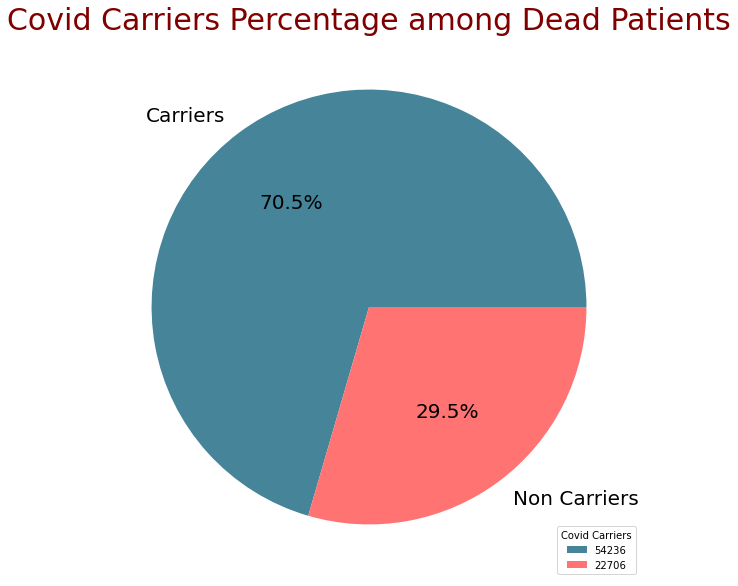

In [47]:
labels = ["Carriers", "Non Carriers"]
sizes = df_dead['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among Dead Patients', color = 'Maroon', fontsize = 30)
plt.legend(df_dead['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

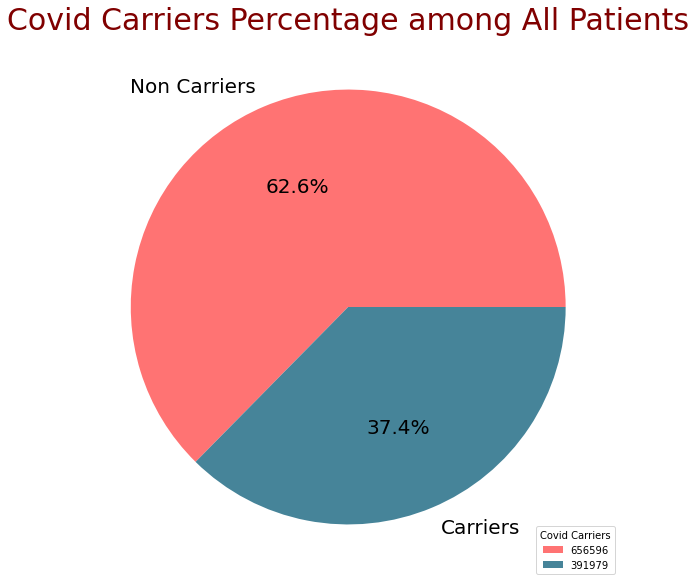

In [48]:
corona_data_csv['Covid_or_Not'] = corona_data_csv["CLASIFFICATION_FINAL"].apply(Covid_or_Not)
labels = ["Non Carriers", "Carriers"]
sizes = corona_data_csv['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among All Patients', color = 'Maroon', fontsize = 30)
plt.legend(corona_data_csv['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [49]:
Covid_deaths = corona_data_csv[(corona_data_csv['Covid_or_Not'] == "A Covid 19 Carrier")]
Covid_deaths["DEAD"].value_counts()

0    337743
1     54236
Name: DEAD, dtype: int64

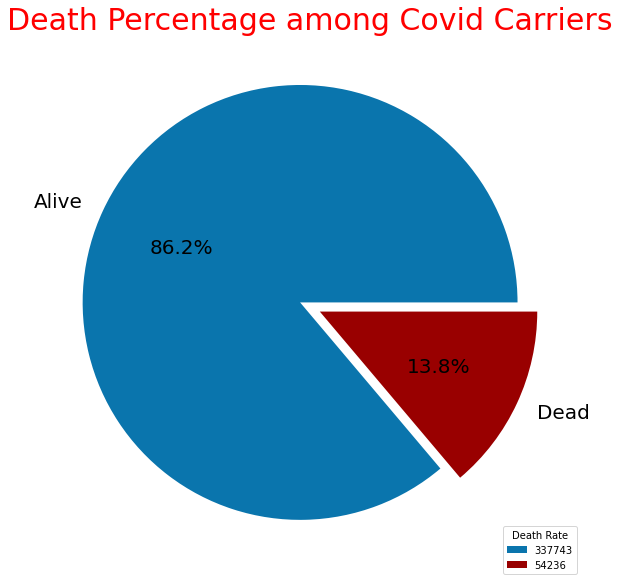

In [50]:
labels = ["Alive", "Dead"]
sizes = Covid_deaths['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage among Covid Carriers',color = 'red',fontsize = 30)
plt.legend(Covid_deaths['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

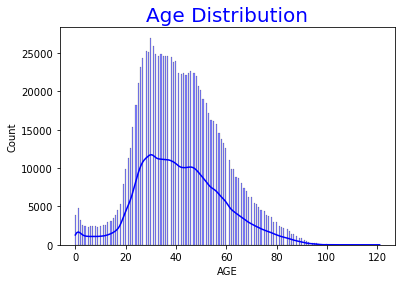

In [51]:
sns.histplot(x=corona_data_csv.AGE, kde = True, color = "blue")
plt.title('Age Distribution', color = 'blue', fontsize = 20)
plt.show()

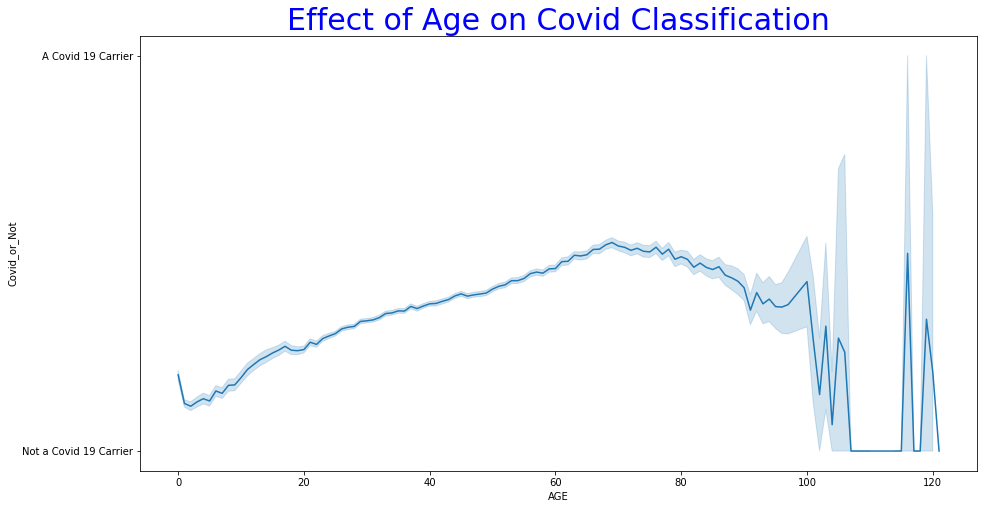

In [52]:
plt.figure(figsize=(15,8))
sns.lineplot(data=corona_data_csv, x="AGE", y="Covid_or_Not")
plt.title('Effect of Age on Covid Classification', color = 'blue', fontsize = 30)
plt.show()

In [53]:
df_mod = corona_data_csv.copy()
df_mod['OBESITY'] = ["Obese" if i==1 else "Not Obese" for i in corona_data_csv.OBESITY]

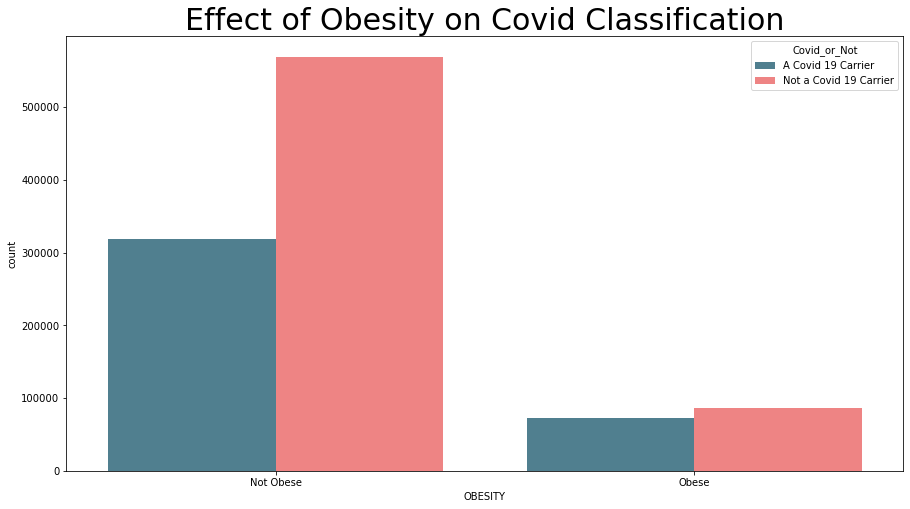

In [54]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="OBESITY", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Obesity on Covid Classification', color = 'black', fontsize = 30)
plt.show()

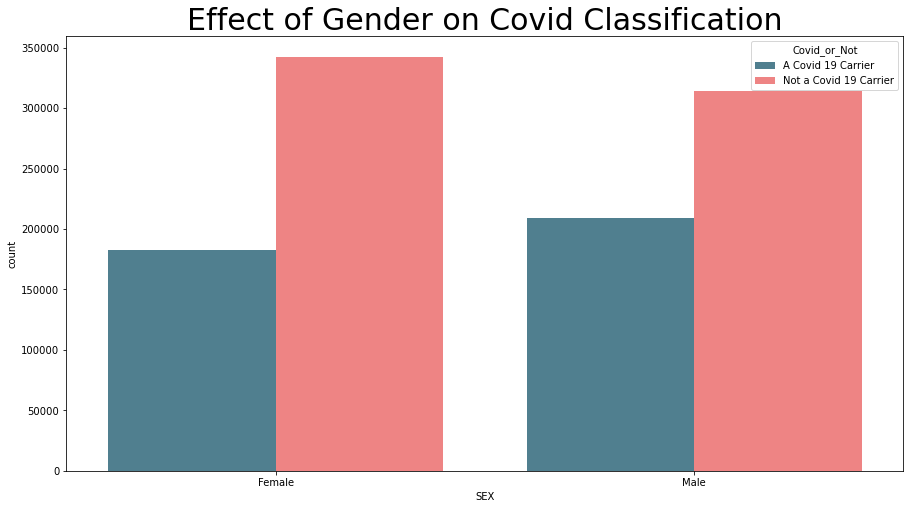

In [55]:
df_mod['SEX'] = ["Female" if i==1 else "Male" for i in corona_data_csv.SEX]
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="SEX", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Gender on Covid Classification', color = 'black', fontsize = 30)
plt.show()

It can be infered that gender doesn't have a great impact on determining if someone is more likely to suffer from COVID or not and hence isn't a good measure to use to estimate the contraction of COVID

In [56]:
df_preg = corona_data_csv[corona_data_csv["SEX"] == 1]
df_preg["PREGNANT"].value_counts()
df_preg['PREGNANT'] = ["Pregnant" if i==1 else "Non Pregnant" for i in df_preg.PREGNANT]

C:\Users\varsh\AppData\Local\Temp\ipykernel_1268684\592688569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preg['PREGNANT'] = ["Pregnant" if i==1 else "Non Pregnant" for i in df_preg.PREGNANT]


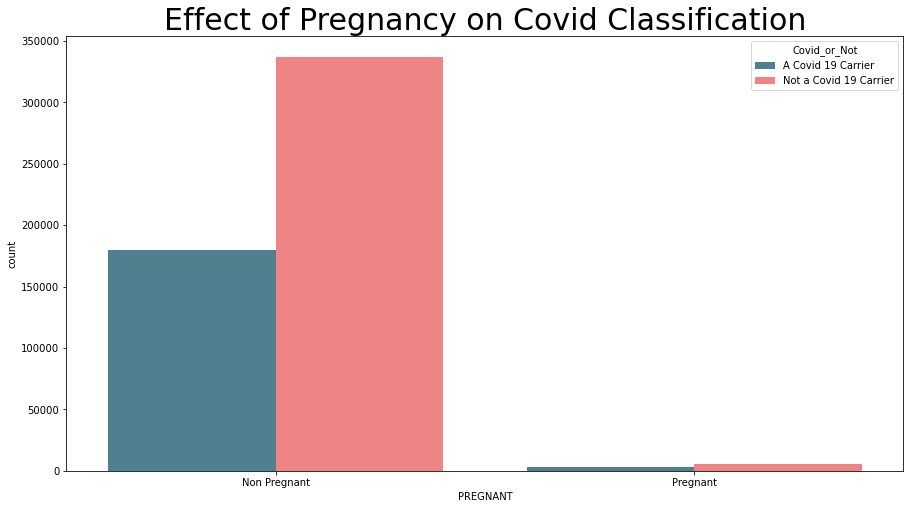

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_preg, x="PREGNANT", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Pregnancy on Covid Classification', color = 'black', fontsize = 30)
plt.show()

It cannot be if noticed pregnant women are more likely to be infected by COVID-19 or not due to the low numbers

In [58]:
df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts()

Not a Covid 19 Carrier    5377
A Covid 19 Carrier        2754
Name: Covid_or_Not, dtype: int64

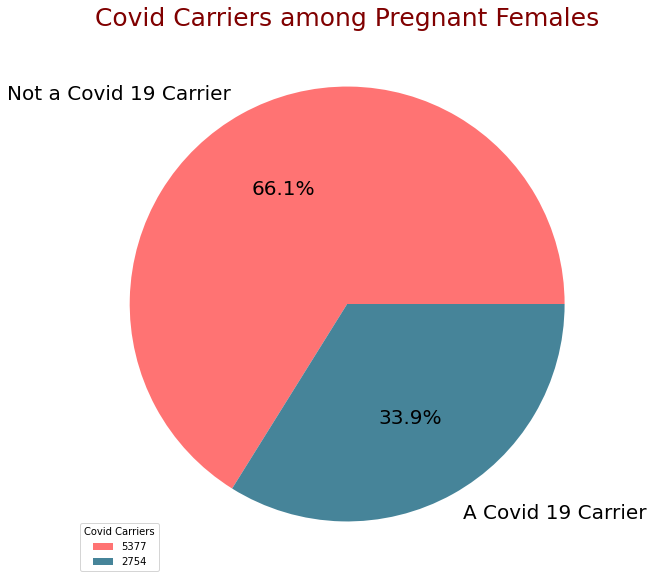

In [59]:
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

In [60]:
df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts()

Not a Covid 19 Carrier    337197
A Covid 19 Carrier        179736
Name: Covid_or_Not, dtype: int64

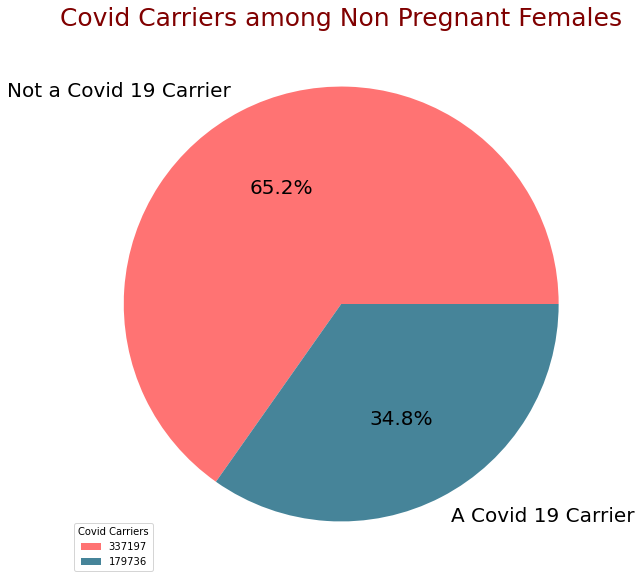

In [61]:
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Non Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Non Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

In [62]:
df_diseases = df_med.drop(columns = ["PREGNANT", "OBESITY", 'DEAD'])

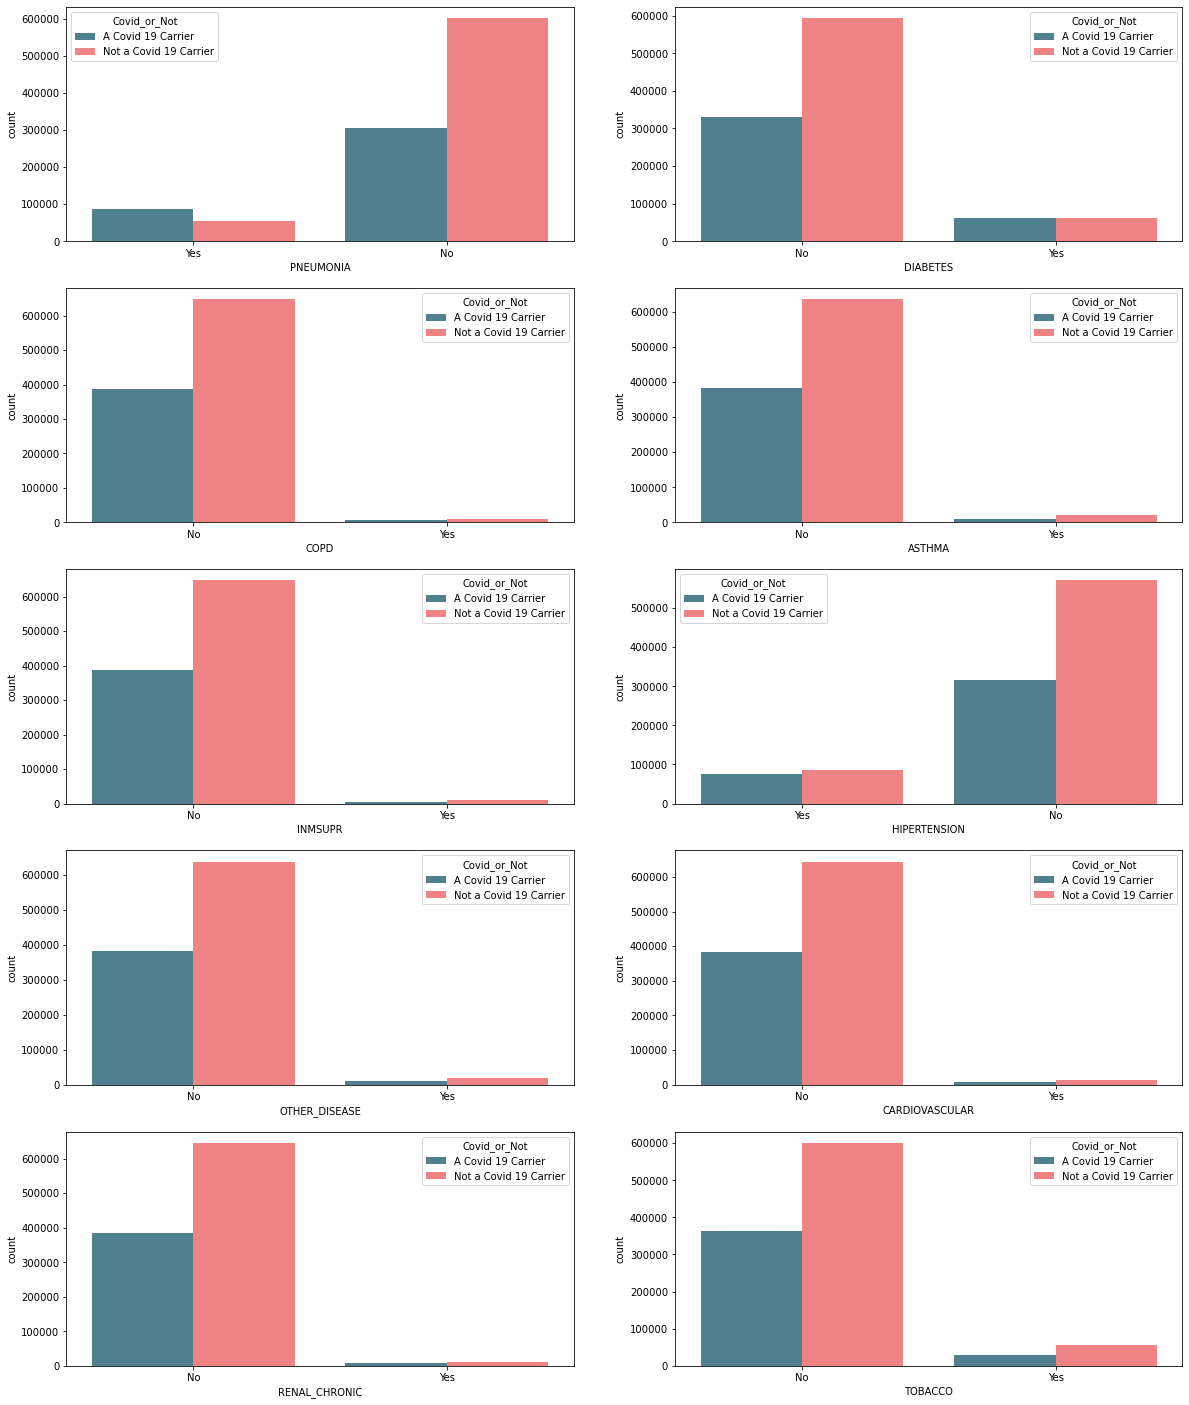

In [63]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    df_diseases[i] = ["Yes" if j==1 else "No" for j in df_diseases[i]]
    sns.countplot(data=df_diseases, x=i, hue=corona_data_csv["Covid_or_Not"], palette = ['#468499', '#ff7373'])
    index += 1
plt.show()

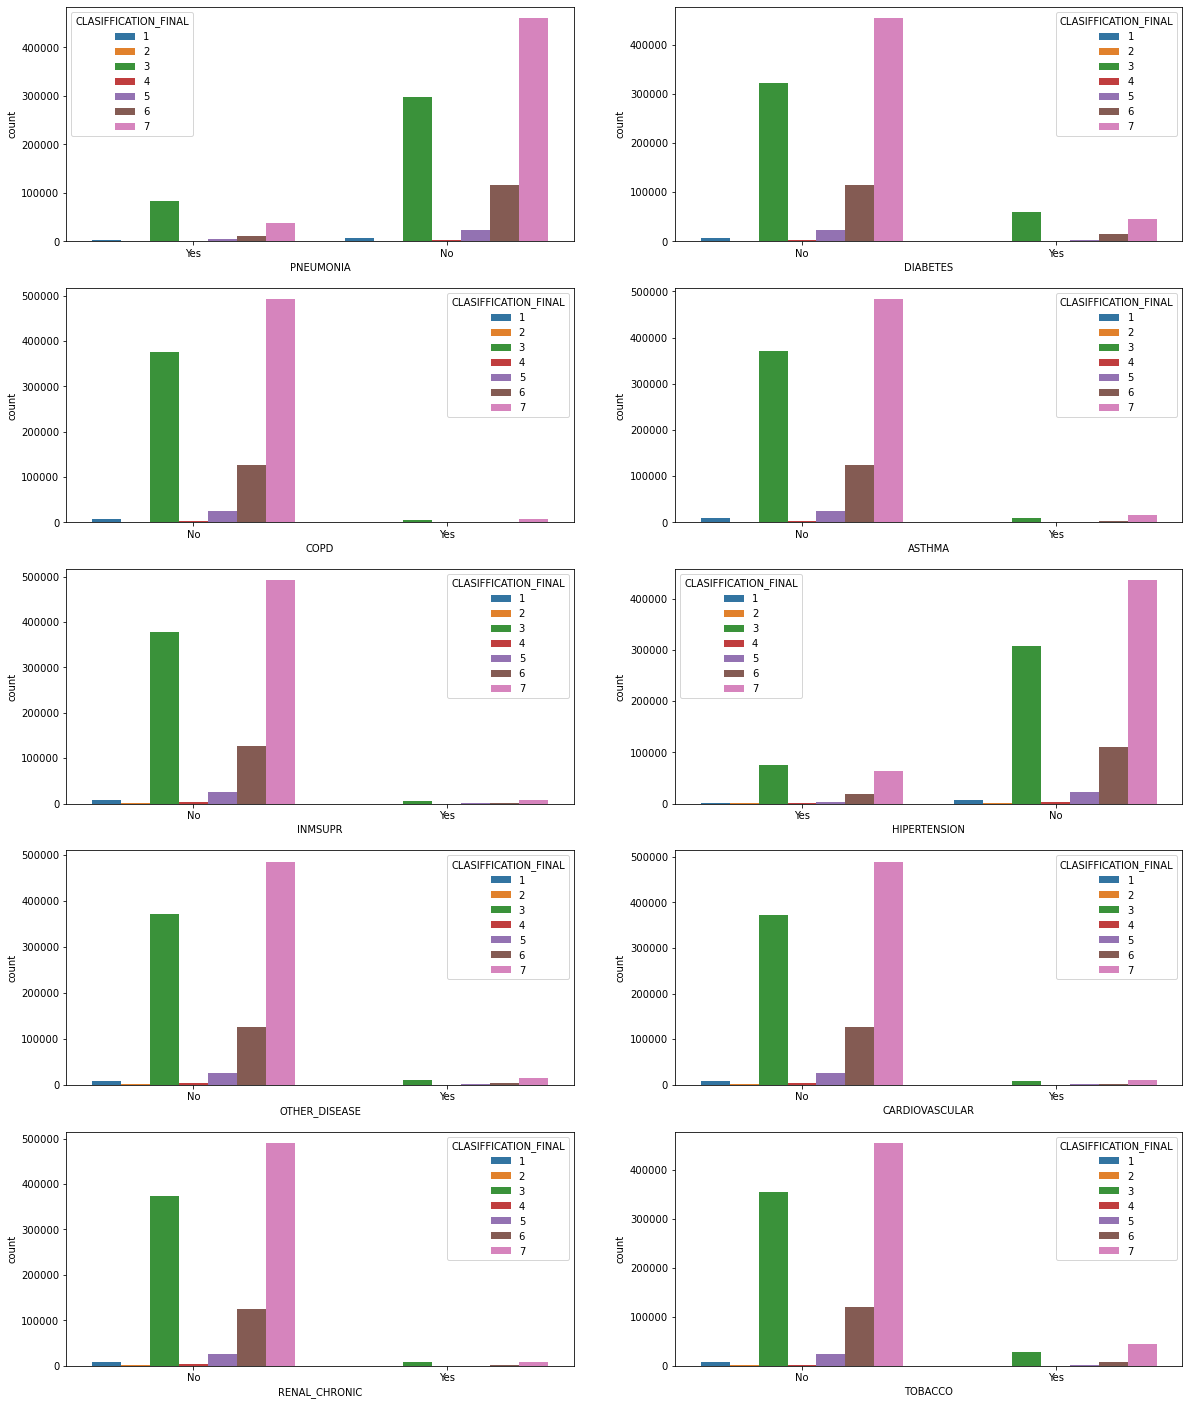

In [64]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    sns.countplot(data=df_diseases, x=i, hue=corona_data_csv['CLASIFFICATION_FINAL'],)

    index += 1
plt.show()

In [65]:
corona_data_csv['PATIENT_TYPE'].value_counts()

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

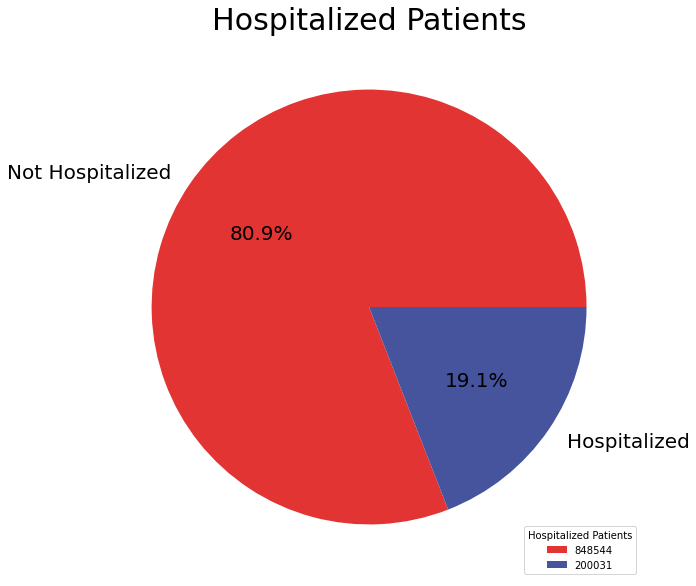

In [66]:
labels = ["Not Hospitalized", "Hospitalized"]
sizes = corona_data_csv['PATIENT_TYPE'].value_counts()
colors = ['#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('Hospitalized Patients',color = 'black',fontsize = 30)
plt.legend(corona_data_csv['PATIENT_TYPE'].value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

In [67]:
df_hosp = corona_data_csv[corona_data_csv['PATIENT_TYPE']==2]

In [68]:
df_hosp['DEAD'] = df_hosp['DEAD'].replace(1, "Dead")
df_hosp['DEAD'] = df_hosp['DEAD'].replace(0, "Alive")

C:\Users\varsh\AppData\Local\Temp\ipykernel_1268684\2481955010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hosp['DEAD'] = df_hosp['DEAD'].replace(1, "Dead")
C:\Users\varsh\AppData\Local\Temp\ipykernel_1268684\2481955010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hosp['DEAD'] = df_hosp['DEAD'].replace(0, "Alive")


In [69]:
df_hosp['DEAD'].value_counts()

Alive    129965
Dead      70066
Name: DEAD, dtype: int64

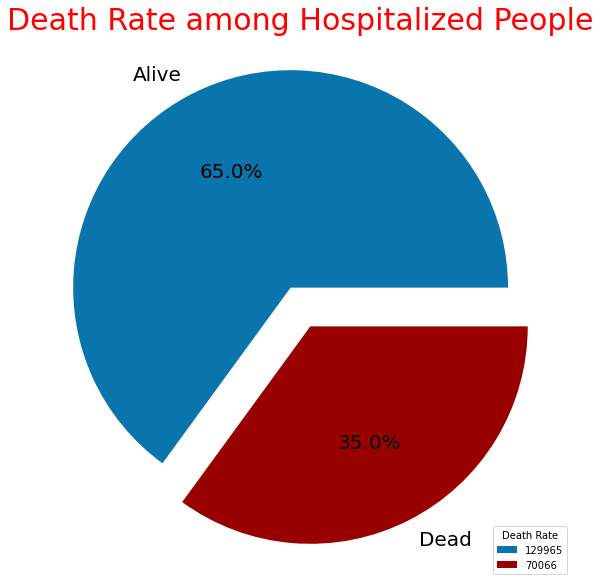

In [70]:
labels = ["Alive", "Dead"]
sizes = df_hosp['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among Hospitalized People', color = 'red', fontsize = 30)
plt.legend(df_hosp['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

We can notice that 35% of the people who were admitted to the hospital died

In [71]:
df_diseases2 = df_hosp.drop(columns = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED','AGE', "PREGNANT",
                                       "OBESITY",'CLASIFFICATION_FINAL', 'ICU', 'DEAD','Covid_or_Not'])

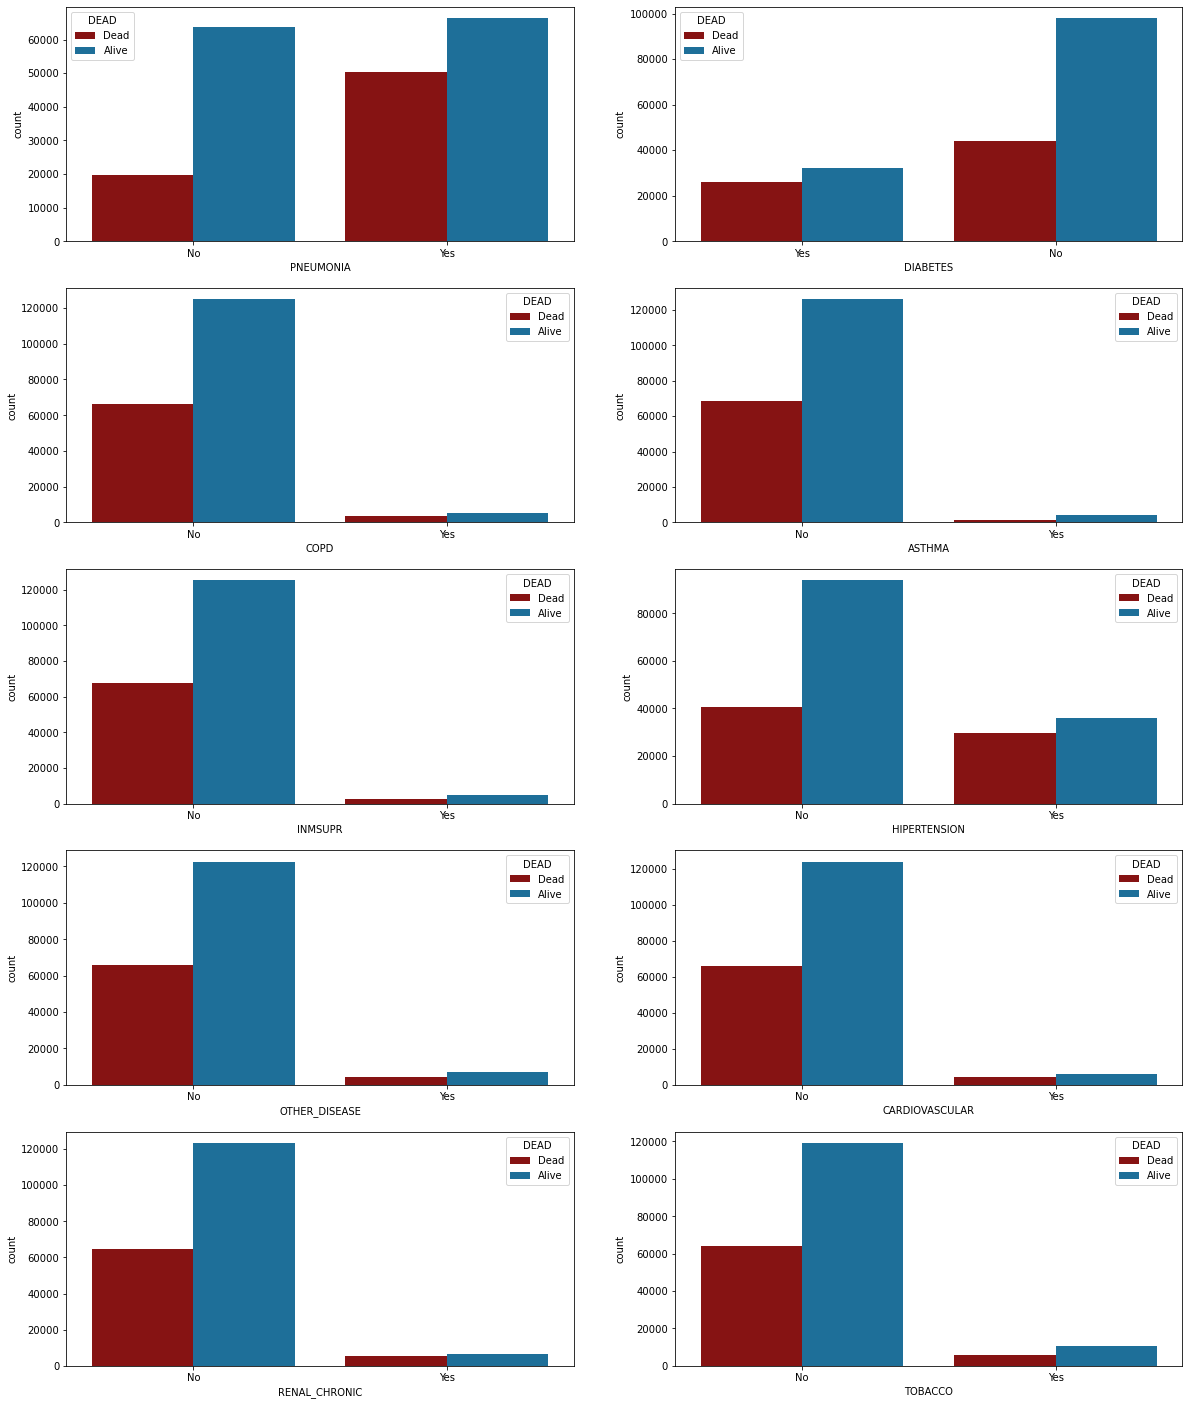

In [72]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases2.columns:
    plt.subplot(5, 2, index)
    df_diseases2[i] = ["Yes" if j==1 else "No" for j in df_diseases2[i]]
    sns.countplot(data=df_diseases2, x=i, hue=df_hosp['DEAD'],
                  palette = [ '#990000', '#0a75ad'])
    index += 1
plt.show()

In [73]:
df_dead.PATIENT_TYPE.value_counts()

2    70066
1     6876
Name: PATIENT_TYPE, dtype: int64

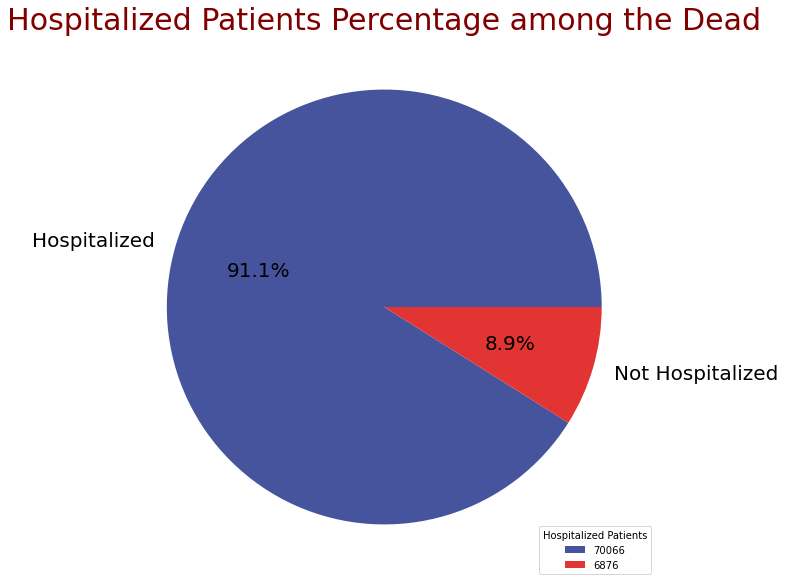

In [74]:
labels = ["Hospitalized", "Not Hospitalized"]
sizes = df_dead.PATIENT_TYPE.value_counts()
colors = ['#46549d', '#e13433']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Hospitalized Patients Percentage among the Dead', color = 'Maroon', fontsize = 30)
plt.legend(df_dead.PATIENT_TYPE.value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

There are 70,066 patients who were hospitalized among the dead, with a great percentage of 91.1%, which makes sense and indicates that only few patients have died after sending them home just after getting classified.

In [75]:
corona_data_csv[(corona_data_csv['PATIENT_TYPE'] == 2) & (corona_data_csv['ICU'] == 1)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
16,2,1,1,2,NaT,2.0,1.0,80.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
20,2,1,2,2,NaT,2.0,1.0,59.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,3,1.0,0,A Covid 19 Carrier
41,2,1,2,2,NaT,1.0,1.0,45.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
56,2,1,1,2,NaT,1.0,1.0,58.0,2.0,2.0,...,1.0,2.0,1.0,1.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
57,2,1,1,2,NaT,1.0,1.0,48.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048255,1,13,2,2,NaT,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
1048270,2,13,1,2,NaT,1.0,1.0,22.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
1048358,1,13,1,2,NaT,1.0,2.0,44.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
1048364,1,13,2,2,NaT,1.0,1.0,55.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,1.0,7,1.0,0,Not a Covid 19 Carrier


In [76]:
corona_data_csv[(corona_data_csv['PATIENT_TYPE'] == 2)]['ICU'].value_counts()

2.0    175685
1.0     16858
Name: ICU, dtype: int64

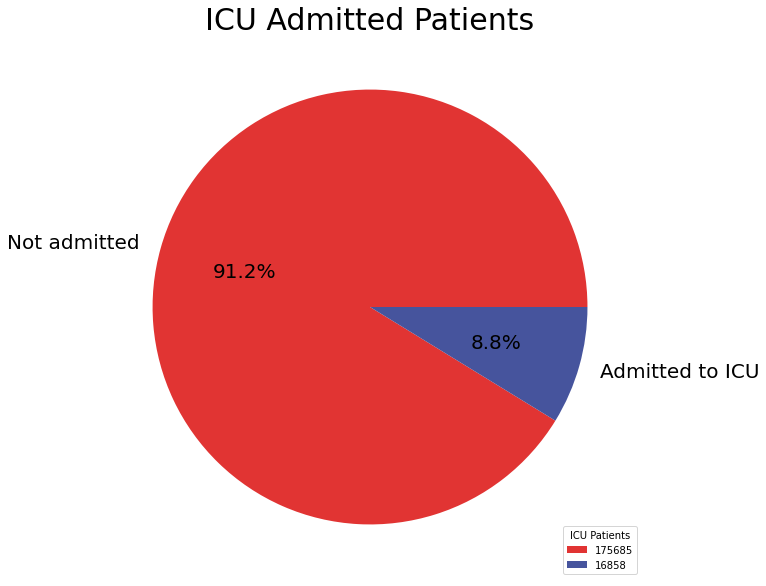

In [77]:
labels = ["Not admitted", "Admitted to ICU"]
sizes = corona_data_csv[(corona_data_csv['PATIENT_TYPE'] == 2)]['ICU'].value_counts()
colors = [ '#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('ICU Admitted Patients',color = 'black',fontsize = 30)
plt.legend(corona_data_csv[(corona_data_csv['PATIENT_TYPE'] == 2)]['ICU'].value_counts(), loc = 'lower right',
           title = 'ICU Patients')
plt.show()

A total of 16858 patients had to be admitted to the ICU during the period 

In [78]:
corona_data_csv[(corona_data_csv['CLASIFFICATION_FINAL'] < 4) & (corona_data_csv['ICU'] == 1)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
16,2,1,1,2,NaT,2.0,1.0,80.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
20,2,1,2,2,NaT,2.0,1.0,59.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,3,1.0,0,A Covid 19 Carrier
41,2,1,2,2,NaT,1.0,1.0,45.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
340,1,3,2,2,2020-04-06,1.0,1.0,90.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,1,A Covid 19 Carrier
341,1,3,2,2,2020-04-07,1.0,1.0,61.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,1.0,1,A Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047735,1,13,2,2,NaT,1.0,1.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
1047737,1,13,2,2,NaT,2.0,2.0,56.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
1047740,1,13,2,2,NaT,2.0,1.0,68.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
1047750,1,13,2,2,NaT,1.0,2.0,35.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier


In [79]:
16858 - 10449

6409

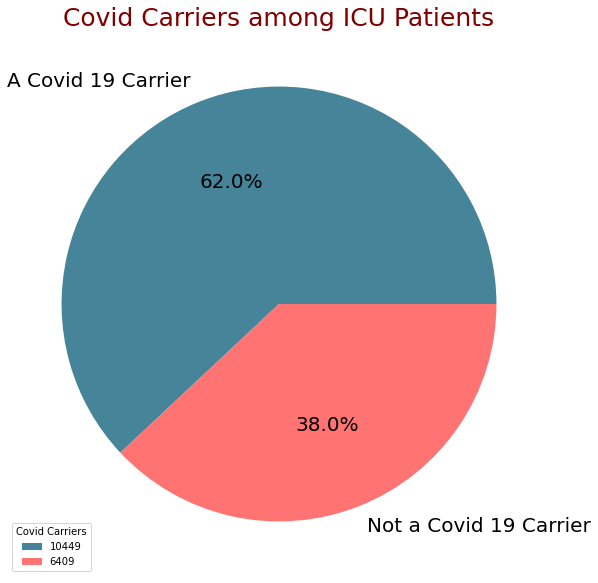

In [80]:
labels = ["A Covid 19 Carrier", "Not a Covid 19 Carrier"]
sizes = corona_data_csv[(corona_data_csv['ICU'] == 1) & (corona_data_csv['ICU'] == 1)]['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(corona_data_csv[(corona_data_csv['ICU'] == 1) & (corona_data_csv['ICU'] == 1)]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among ICU Patients', color = 'maroon', fontsize = 25)
plt.show()

In [81]:
corona_data_csv[(corona_data_csv['ICU'] == 1)]['DEAD'].value_counts()

0    8663
1    8195
Name: DEAD, dtype: int64

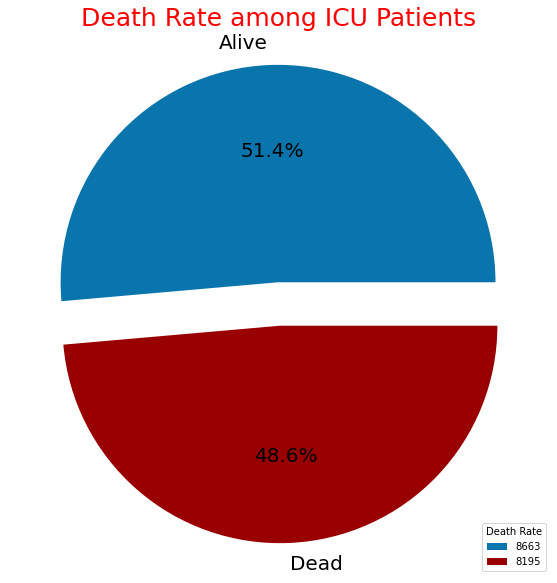

In [82]:
labels = ["Alive", "Dead"]
sizes = corona_data_csv[(corona_data_csv['ICU'] == 1)]['DEAD'].value_counts()
colors = [ '#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among ICU Patients', color = 'red', fontsize = 25)
plt.legend(corona_data_csv[(corona_data_csv['ICU'] == 1)]['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

It can be infered that almost half the patients that were admitted to the ICU passed away

Text(0.5, 1.0, 'Death Trend through Time')

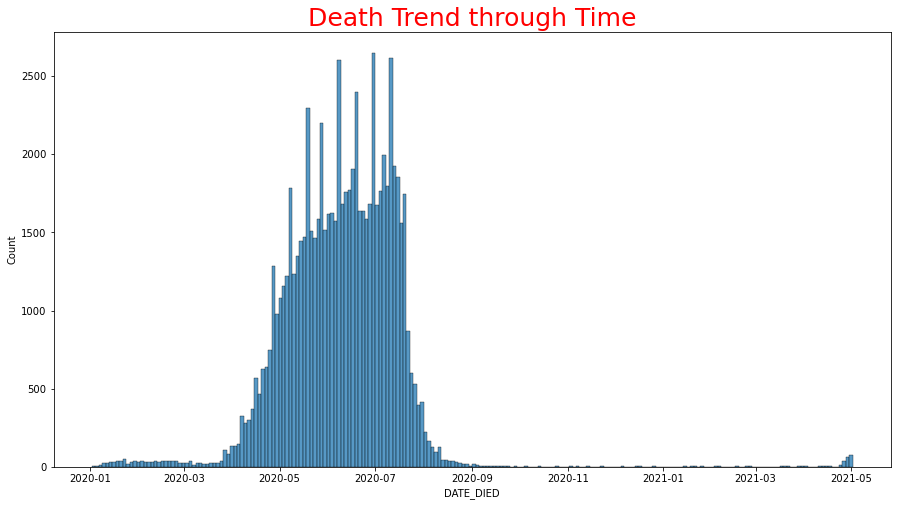

In [83]:
plt.figure(figsize=(15,8))
sns.histplot(data=corona_data_csv, x="DATE_DIED")
plt.title('Death Trend through Time', color = 'red', fontsize = 25)

It can be understood that deaths were much higher in 2020 especially from the month of May to August

In [84]:
df_model = corona_data_csv.drop(columns=['DATE_DIED','SEX'])

In [85]:
df_model.dropna().shape

(1019473, 21)

In [86]:
df_model.shape

(1048575, 21)

In [87]:
df_model.dropna(inplace = True) # as the number of missing values becomes insignificant 

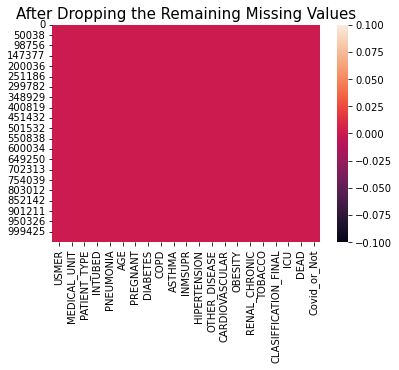

In [88]:
sns.heatmap(df_model.isnull())
plt.title('After Dropping the Remaining Missing Values', color = 'black', fontsize = 15)
plt.show()

In [89]:
df_model.Covid_or_Not.value_counts()

Not a Covid 19 Carrier    633448
A Covid 19 Carrier        386025
Name: Covid_or_Not, dtype: int64

In [90]:
df_model.Covid_or_Not = df_model.Covid_or_Not.apply(lambda x: 2 if x=="Not a Covid 19 Carrier" else 1)

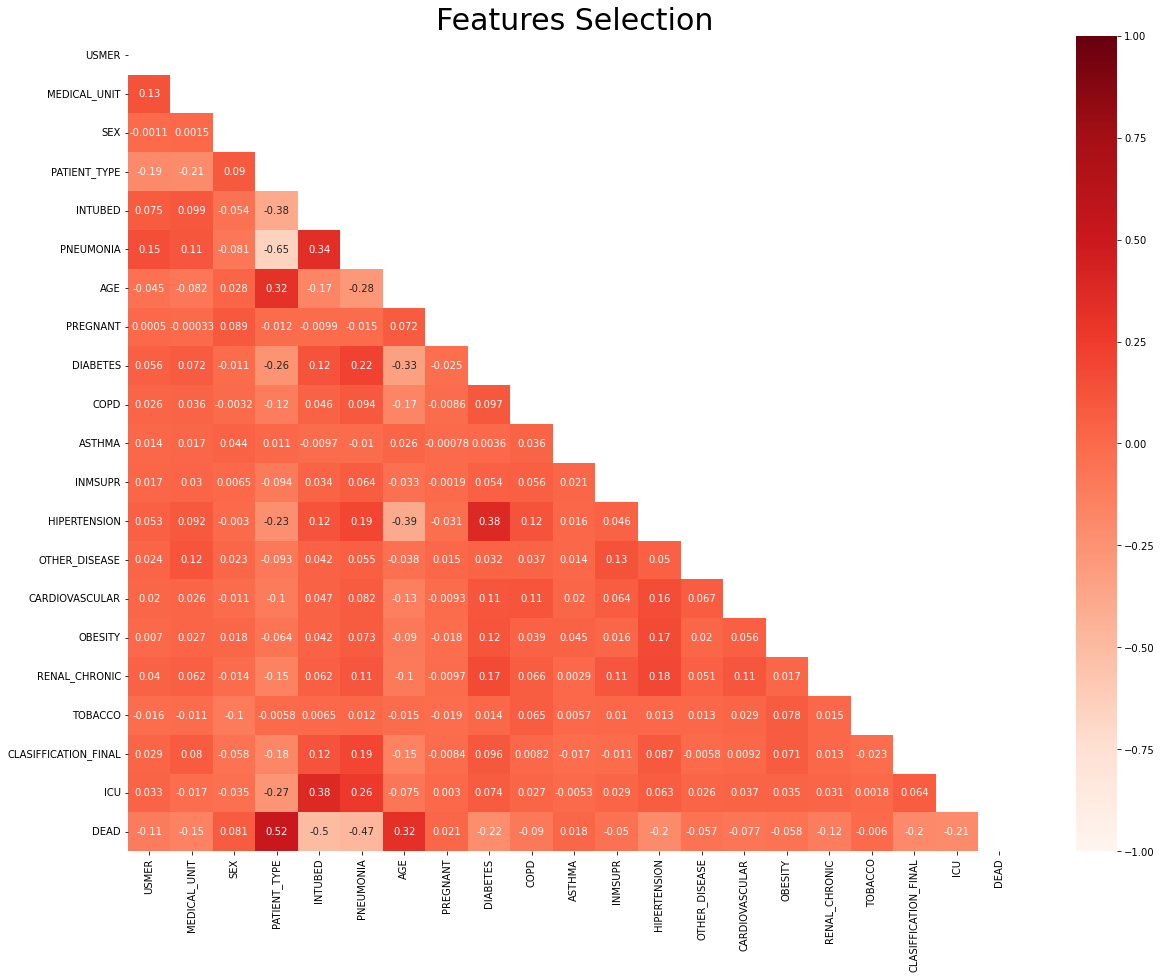

In [91]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(corona_data_csv.corr()))
sns.heatmap(corona_data_csv.corr(), annot = True, cmap = "Reds", vmin = -1, vmax = 1, mask = mask)
plt.title('Features Selection', color = 'black', fontsize = 30)
plt.show()

In [92]:
unrelevant_features=['PREGNANT','COPD','ASTHMA','INMSUPR','OTHER_DISEASE','CARDIOVASCULAR','TOBACCO','OBESITY']
df_model.drop(columns=unrelevant_features,inplace=True)

In [93]:
df_model.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
0,2,1,1,2.0,1.0,65.0,2.0,1.0,2.0,3,2.0,1,1
1,2,1,1,2.0,1.0,72.0,2.0,1.0,1.0,5,2.0,1,2
2,2,1,2,1.0,2.0,55.0,1.0,2.0,2.0,3,2.0,1,1
3,2,1,1,2.0,2.0,53.0,2.0,2.0,2.0,7,2.0,1,2
4,2,1,1,2.0,2.0,68.0,1.0,1.0,2.0,3,2.0,1,1


In [94]:
X = df_model.drop('DEAD' , axis= 1)
Y = df_model['DEAD']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [96]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [97]:
print(correlation(x_train, 0.7))

{'Covid_or_Not'}


In [98]:
x_train.drop('Covid_or_Not',axis=1, inplace = True)
x_test.drop('Covid_or_Not',axis=1, inplace = True)

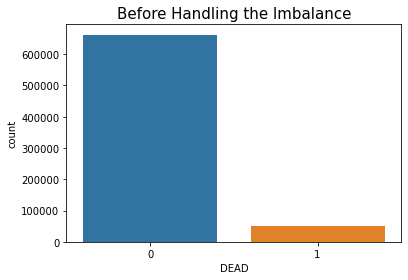

In [99]:
sns.countplot(x = y_train)
plt.title('Before Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

In [100]:
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

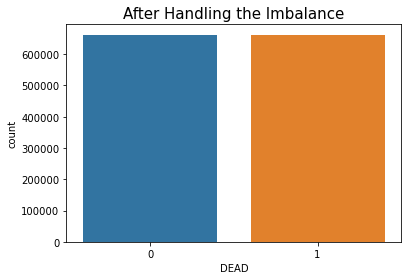

In [101]:
sns.countplot(x = y_train)
plt.title('After Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

In [102]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Logistic Regression Train Accuracy: ", lr.score(x_train,y_train), "\n")
print("Logistic Regression Test Accuracy: ", lr.score(x_test,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Train Accuracy:  0.9053909760241646 

Logistic Regression Test Accuracy:  0.898588159899556


In [103]:
Classes = ['Not Dead', 'Dead']
print("Logistic Regression Classification Report:", "\n", classification_report(y_test, lr.predict(x_test), target_names = Classes))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.90      0.94    284090
        Dead       0.41      0.91      0.56     21752

    accuracy                           0.90    305842
   macro avg       0.70      0.91      0.75    305842
weighted avg       0.95      0.90      0.92    305842



In [104]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
print("Decision Tree Train Accuracy: ", dt.score(x_train,y_train), "\n")
print("Decision Tree Test Accuracy: ", dt.score(x_test,y_test))

Decision Tree Train Accuracy:  0.9526803851236549 

Decision Tree Test Accuracy:  0.9156721444405935


In [105]:
print("Decision Tree Classification Report:", "\n",classification_report(y_test, dt.predict(x_test), target_names = Classes))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.98      0.93      0.95    284090
        Dead       0.45      0.77      0.57     21752

    accuracy                           0.92    305842
   macro avg       0.71      0.85      0.76    305842
weighted avg       0.94      0.92      0.93    305842



In [106]:
rf=RandomForestClassifier(n_estimators=4,random_state=42)
rf.fit(x_train,y_train)
print("Random Forest Train Accuracy: ", rf.score(x_train,y_train), "\n")
print("Random Forest Forest Test Accuracy: ", rf.score(x_test,y_test))

Random Forest Train Accuracy:  0.9516156314895223 

Random Forest Forest Test Accuracy:  0.9151653468130604


In [107]:
print("Random Forest Classification Report:", "\n",classification_report(y_test, rf.predict(x_test), target_names = Classes))

Random Forest Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.98      0.93      0.95    284090
        Dead       0.45      0.78      0.57     21752

    accuracy                           0.92    305842
   macro avg       0.71      0.85      0.76    305842
weighted avg       0.94      0.92      0.93    305842

